# Bayesian Data Analysis - Assignment 7

Note: all source code is at the end of the report. If this is to be executed, the source code need to be ran first for the functions in the report to be referenced

## 1 Linear model with drowning data



i) **Trending** in the number of people drown per year. 

There is a **decreasing trend** in the number of people drown per year from 1980 to 2016. The trend can be seen in the plot below

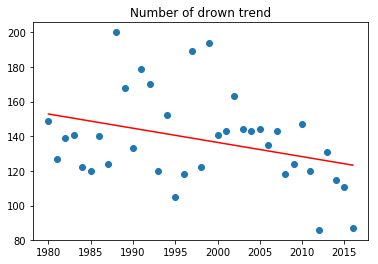

<Figure size 1440x1440 with 0 Axes>

In [46]:
plot_trend()

Below is **the histogram of the slope** of the linear model

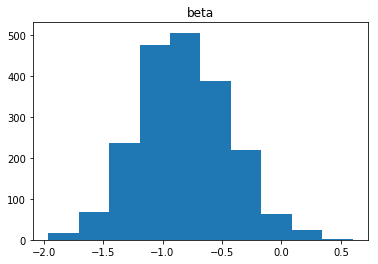

In [47]:
plot_beta_hist()

ii) The histogram of the posterior predictive distribution for number of people drown in year 2019.

In [43]:
import pystan
import numpy as np
import pickle
import matplotlib.pyplot as plt

raw_data = np.loadtxt('drowning.txt')
year = raw_data[:,0]
drown_count = raw_data[:,1]

stan_model="""
data {
    int<lower=0> N; // number of data points
    vector[N] x; // observation year
    vector[N] y; // observation number of drowned
    real xpred; // prediction year
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = alpha + beta*x;
}
model {
    sigma ~ cauchy(0, 2.5);
    y ~ normal(mu, sigma);
}
generated quantities {
    real ypred;
    ypred = normal_rng(alpha + beta*xpred, sigma);
}
"""

data = dict(N=37, x=year, y=drown_count, xpred=2019)
        
sm = pystan.StanModel(model_code=stan_model)
fit = sm.sampling(data=data, iter=1000, chains=4)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_32beae943e688fd16954dac030f4421b NOW.
C:\Users\phuct\Miniconda3\envs\stan\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\phuct\AppData\Local\Temp\tmp6gr4a3d9\stanfit4anon_model_32beae943e688fd16954dac030f4421b_3533084785716314507.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_32beae943e688fd16954dac030f4421b.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  1774.6   36.46 763.48 214.39 1269.8 1790.0 2289.4 3242.2    438    1.0
beta    -0.82    0.02   0.38  -1.55  -1.08  -0.83  -0.57  -0.04    438    1.0
sigma   25.37    0.12   3.22   20.0  23.04   25.1  27.39  32.52    782    1.0
mu[1]  152.84    0.34   8.12 136.54 147.43 152.83 158.37 168.35    561    1.0
mu[2]  152.02    0.33   7.79 136.46  146.8 151.99 157.33 166.84    574    1.0
mu[3]   151.2    0.31   7.47 136.28 146.22 151.15 156.34 165.38    589    1.0
mu[4]  150.38    0.29   7.16  136.1 145.61 150.32 155.32  164.0    606    1.0
mu[5]  149.56    0.27   6.85 136.01 144.99 149.51 154.27 162.53    626    1.0
mu[6]  148.74    0.26   6.55 135.88 144.41  148.7 153.27  161.1    650    1.0
mu[7]  147.92    0.24   6.26 135.

In [44]:
samples = fit.extract(permuted=True)
print(samples['mu'])

[[144.52266157 143.57669798 142.63073439 ... 112.3598995  111.41393591
  110.46797232]
 [165.96590184 164.63214157 163.2983813  ... 120.61805281 119.28429254
  117.95053228]
 [150.97901432 150.17972641 149.3804385  ... 123.80322545 123.00393755
  122.20464964]
 ...
 [166.54549483 164.79393832 163.04238181 ... 106.99257344 105.24101693
  103.48946041]
 [170.66818499 169.19586765 167.72355031 ... 120.60939556 119.13707823
  117.66476089]
 [158.49069769 157.49994345 156.5091892  ... 124.80505352 123.81429928
  122.82354504]]


In [45]:
def plot_trend():
    plt.scatter(year, drown_count)
    year_x = np.arange(1980, 2017, 1)
    beta_mean = np.mean(samples['beta'])
    alpha_mean = np.mean(samples['alpha'])
    drown_count_y = [alpha_mean + x * beta_mean for x in year_x]
    plt.plot(year_x, drown_count_y, color='r')
    plt.title('Number of drown trend')
    plt.show()


def plot_beta_hist():
    plt.hist(samples['beta'])
    plt.title('beta')
    plt.show()
    
def plot_ypred_hist():
    plt.hist(samples['ypred'])
    plt.title('posterior predictive histogram for year 2019')
    plt.show()
